> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (Replace this with something more specific!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables.
>
> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. If you're not sure what questions to ask right now, then make sure you familiarize yourself with the variables and the dataset context for ideas of what to explore.
>
> **Brief introduction to the dataset I've selected for analysis:**
>
> The TMDb movie data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
> * Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
> * There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
> * The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
>
> **Questions:**
> * 1. How is the Walt Disney's profit year by year?
> * 2. What is the people demand for watching movies year by year?

In [15]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import csv
from datetime import datetime
import matplotlib.pyplot as plt
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [111]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 10866 entries, 0 to 10865

Data columns (total 21 columns):

 #   Column                Non-Null Count  Dtype  

---  ------                --------------  -----  

 0   id                    10866 non-null  int64  

 1   imdb_id               10856 non-null  object 

 2   popularity            10866 non-null  float64

 3   budget                10866 non-null  int64  

 4   revenue               10866 non-null  int64  

 5   original_title        10866 non-null  object 

 6   cast                  10790 non-null  object 

 7   homepage              2936 non-null   object 

 8   director              10822 non-null  object 

 9   tagline               8042 non-null   object 

 10  keywords              9373 non-null   object 

 11  overview              10862 non-null  object 

 12  runtime               10866 non-null  int64  

 13  genres                10843 non-null  object 

 14  production_companies  9836 non-null   object 

 15 

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In this section, we will get used columns from dataset, remove duplicate rows and rows with invalid values.

In [20]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.

1. Get used columns for this investigation

In [112]:
df.drop(['id','imdb_id','budget','revenue','genres','original_title','cast','homepage','director','tagline','keywords','overview','runtime','vote_count','vote_average'], axis=1, inplace=True)
df.to_csv('tmdb-movies-edited.csv', index=False)
df_movies = pd.read_csv('tmdb-movies-edited.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 10866 entries, 0 to 10865

Data columns (total 6 columns):

 #   Column                Non-Null Count  Dtype  

---  ------                --------------  -----  

 0   popularity            10866 non-null  float64

 1   production_companies  9836 non-null   object 

 2   release_date          10866 non-null  object 

 3   release_year          10866 non-null  int64  

 4   budget_adj            10866 non-null  float64

 5   revenue_adj           10866 non-null  float64

dtypes: float64(3), int64(1), object(2)

memory usage: 509.5+ KB


2. Remove duplicate records

In [114]:
df_movies.drop_duplicates(inplace=True)
df_movies.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 9835 entries, 0 to 9835

Data columns (total 6 columns):

 #   Column                Non-Null Count  Dtype  

---  ------                --------------  -----  

 0   popularity            9835 non-null   float64

 1   production_companies  9835 non-null   object 

 2   release_date          9835 non-null   object 

 3   release_year          9835 non-null   int64  

 4   budget_adj            9835 non-null   float64

 5   revenue_adj           9835 non-null   float64

dtypes: float64(3), int64(1), object(2)

memory usage: 537.9+ KB


3. Remove rows with empty production_companies

In [115]:
df_movies.dropna(subset=['production_companies'], inplace=True)  
df_movies.to_csv('tmdb-movies-edited.csv', index=False)
df_movies = pd.read_csv('tmdb-movies-edited.csv')
df_movies.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 9835 entries, 0 to 9834

Data columns (total 6 columns):

 #   Column                Non-Null Count  Dtype  

---  ------                --------------  -----  

 0   popularity            9835 non-null   float64

 1   production_companies  9835 non-null   object 

 2   release_date          9835 non-null   object 

 3   release_year          9835 non-null   int64  

 4   budget_adj            9835 non-null   float64

 5   revenue_adj           9835 non-null   float64

dtypes: float64(3), int64(1), object(2)

memory usage: 461.1+ KB


4. Remove rows with '0' values

In [116]:
df_clean_invalid_values = df_movies.replace(0,np.NaN)
df_movies = df_clean_invalid_values.dropna()
df_movies.to_csv('tmdb-movies-edited.csv', index=False)
df_movies = pd.read_csv('tmdb-movies-edited.csv')
df_movies.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 3808 entries, 0 to 3807

Data columns (total 6 columns):

 #   Column                Non-Null Count  Dtype  

---  ------                --------------  -----  

 0   popularity            3808 non-null   float64

 1   production_companies  3808 non-null   object 

 2   release_date          3808 non-null   object 

 3   release_year          3808 non-null   int64  

 4   budget_adj            3808 non-null   float64

 5   revenue_adj           3808 non-null   float64

dtypes: float64(3), int64(1), object(2)

memory usage: 178.6+ KB


5. Change some columns type to integer or string

In [117]:
df_movies[['popularity','release_year','budget_adj', 'revenue_adj']] = df_movies[['popularity','release_year','budget_adj', 'revenue_adj']].applymap(np.int64)
df_movies['production_companies'] = df_movies['production_companies'].astype("string")
df_movies.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 3808 entries, 0 to 3807

Data columns (total 6 columns):

 #   Column                Non-Null Count  Dtype 

---  ------                --------------  ----- 

 0   popularity            3808 non-null   int64 

 1   production_companies  3808 non-null   string

 2   release_date          3808 non-null   object

 3   release_year          3808 non-null   int64 

 4   budget_adj            3808 non-null   int64 

 5   revenue_adj           3808 non-null   int64 

dtypes: int64(4), object(1), string(1)

memory usage: 178.6+ KB


6. Add profit column -> Caculating this column by (revenue_adj - budget_adj)

In [118]:
df_movies.insert(6,'profit',df_movies['revenue_adj']-df_movies['budget_adj'])
df_movies.to_csv('tmdb-movies-edited.csv', index=False)
df_movies = pd.read_csv('tmdb-movies-edited.csv')
df_movies.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 3808 entries, 0 to 3807

Data columns (total 7 columns):

 #   Column                Non-Null Count  Dtype 

---  ------                --------------  ----- 

 0   popularity            3808 non-null   int64 

 1   production_companies  3808 non-null   object

 2   release_date          3808 non-null   object

 3   release_year          3808 non-null   int64 

 4   budget_adj            3808 non-null   int64 

 5   revenue_adj           3808 non-null   int64 

 6   profit                3808 non-null   int64 

dtypes: int64(5), object(2)

memory usage: 208.4+ KB


7. Get rows having production_companies contains 'Walt Disney Pictures'

In [119]:
df_Disney_movies = df_movies[df_movies['production_companies'].str.contains("Walt Disney Pictures")]
df_Disney_movies.to_csv('tmdb-Disney-movies.csv', index=False)
df_Disney_movies = pd.read_csv('tmdb-Disney-movies.csv')
df_Disney_movies.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 117 entries, 0 to 116

Data columns (total 7 columns):

 #   Column                Non-Null Count  Dtype 

---  ------                --------------  ----- 

 0   popularity            117 non-null    int64 

 1   production_companies  117 non-null    object

 2   release_date          117 non-null    object

 3   release_year          117 non-null    int64 

 4   budget_adj            117 non-null    int64 

 5   revenue_adj           117 non-null    int64 

 6   profit                117 non-null    int64 

dtypes: int64(5), object(2)

memory usage: 6.5+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (How is the Walt Disney's profit year by year?)

In [12]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
def disney_trend(column_profit,column_year):
    df_movies = pd.read_csv('tmdb-Disney-movies.csv')
    #graph size
    plt.figure(figsize=(6,4), dpi = 120)
    
    plt.plot(df_movies.groupby(column_profit)[column_year].sum())
    max_year = df_movies.groupby(column_profit)[column_year].sum().idxmax()
    max_value = df_movies.groupby(column_profit)[column_year].sum().max()
    min_year = df_movies.groupby(column_profit)[column_year].sum().idxmin()
    min_value = df_movies.groupby(column_profit)[column_year].sum().min()
    
    return max_year,max_value,min_year,min_value,plt

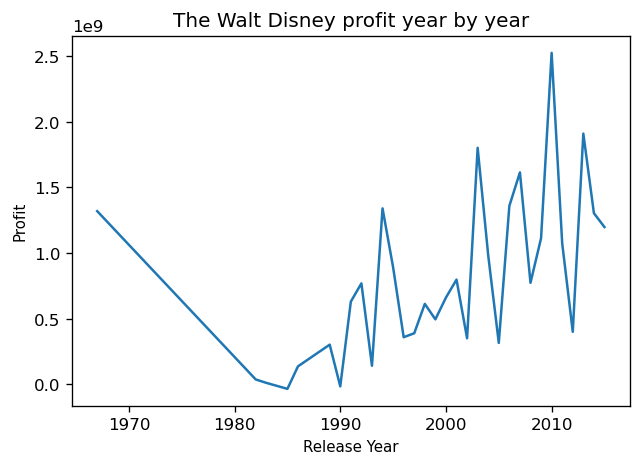

Year has max profit:  2010  with value:  2526186476

Year has min profit:  1985  with value:  -35624417


In [13]:
max_year,max_value,min_year,min_value,plt = disney_trend('release_year','profit')
plt.xlabel('Release Year', fontsize = 9)
plt.ylabel('Profit', fontsize = 9)
plt.title('The Walt Disney profit year by year')
plt.show()
print('Year has max profit: ',max_year,' with value: ', max_value)
print('Year has min profit: ',min_year,' with value: ', min_value)

**Observation:**
>
> From the above chart, it can  be seen that the profit of Disney goes down from 1970 to 1985. Then, it goes up again. 

### Research Question 2  (What is the people demand for watching movies year by year?)

́́**Investigate:**
> This question can be investigated through 2 variables (the movies' profit and popularity):
> * For the movies' profit, we need to see the profit trend over the years
> * For the movies' popularity, we need to see the popularity year by year

**1. The profit trend over the years**

In [108]:
def profit_trend(column_profit,column_year):
    df_movies = pd.read_csv('tmdb-movies-edited.csv')
    #graph size
    plt.figure(figsize=(6,4), dpi = 120)
    
    plt.plot(df_movies.groupby(column_profit)[column_year].sum())
    max_year = df_movies.groupby(column_profit)[column_year].sum().idxmax()
    max_value = df_movies.groupby(column_profit)[column_year].sum().max()
    min_year = df_movies.groupby(column_profit)[column_year].sum().idxmin()
    min_value = df_movies.groupby(column_profit)[column_year].sum().min()
    
    return max_year,max_value,min_year,min_value,plt

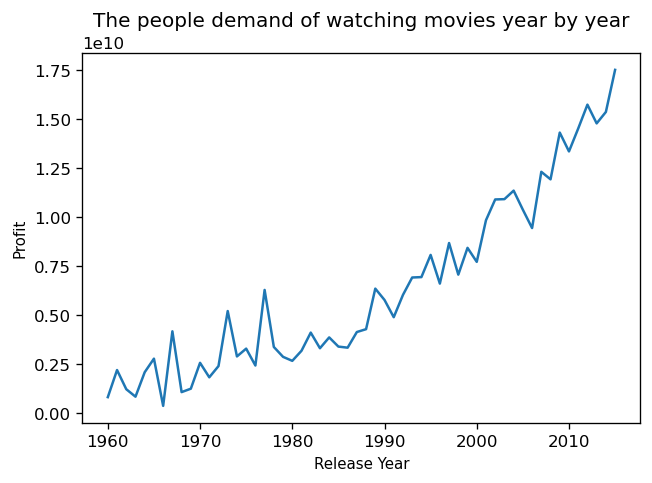

Year has max profit:  2015  with value:  17509565964

Year has min profit:  1966  with value:  352485422


In [109]:
max_year,max_value,min_year,min_value,plt = profit_trend('release_year','profit')
plt.xlabel('Release Year', fontsize = 9)
plt.ylabel('Profit', fontsize = 9)
plt.title('The people demand of watching movies year by year')
plt.show()
print('Year has max profit: ',max_year,' with value: ', max_value)
print('Year has min profit: ',min_year,' with value: ', min_value)

**2. The movies' popularity year by year**

In [177]:
def popularity_trend(column_profit,column_popularity,column_year):
    df_movies = pd.read_csv('tmdb-movies-edited.csv')
    #graph size
#     plt.figure(figsize=(10,5), dpi = 100)
    
    bins = [1960,1970,1980,1990,2000,2010]
    group_names=['1960-1970','1970-1980','1980-1990','1990-2000','2000-2010','2010-2015']
    ind = np.digitize(df_movies[column_year], bins)
    
    df_profit = df_movies.groupby(ind)[column_profit].sum().to_frame()
#     df_profit.head()
#     print(df_profit)
    
    df_popularity = df_movies.groupby(ind)[column_popularity].sum().to_frame()
    X_axis = np.arange(1960,2015,10)
    
    fig,ax=plt.subplots()
    ax.plot(X_axis, df_profit[column_profit].to_list(), color="red", marker="o")
    ax.set_xlabel('Release Year')
    ax.set_ylabel('Profit (dollars)', color="red")
    
    ax2=ax.twinx()
    ax2.plot(X_axis, df_popularity[column_popularity].to_list(), color="blue",marker="o")
    ax2.set_ylabel("Popularity", color="blue")
#     plt.bar(X_axis-0.2, df_profit[column_profit].to_list(), 0.4 , label = 'Profit')
#     plt.bar(X_axis+0.2, df_popularity[column_popularity].to_list(), 0.4 , label = 'Popularity')
    
#     plt.xticks(bins, group_names)
#     plt.xlabel("Release Year")
#     plt.ylabel("Amount of money (Dollars)")
#     plt.title("The people demand for watching movies year by year")
#     plt.legend()
    
    plt.show()

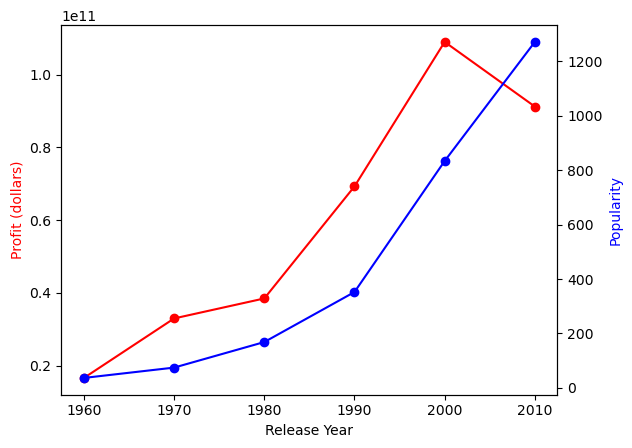

In [178]:
popularity_trend('profit','popularity','release_year')

**Observation:**
> From both charts above, it can be seen that the movies' profit and popularity are increasing from 1960 to 2015. Therefore, the people demand of watching movies also increase year by year.

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

In this investigation, we can find that there is more demand for watching movies year by year. Besides, we know the Disney's profit as well as the max and min profit it had from 1960 to 2015.

However, there are still limits. The above observations may be not accurate because of the lacking of data from removing some invalid datas.